# Using normal data

This tutorial shows how to use the descartes_rpa module with scanpy formated data outside of Descartes. Data from the [Trajectory inference for hematopoiesis in mouse](https://scanpy-tutorials.readthedocs.io/en/latest/paga-paul15.html) tutorial will be used.

In [1]:
import scanpy as sc

In [2]:
adata = sc.datasets.paul15()

  0%|          | 0.00/9.82M [00:00<?, ?B/s]

... storing 'paul15_clusters' as categorical
Trying to set attribute `.uns` of view, copying.


In [3]:
adata.X = adata.X.astype('float64')  # this is not required and results will be comparable without it

In [4]:
sc.pp.recipe_zheng17(adata)

In [5]:
sc.tl.pca(adata, svd_solver='arpack')

In [6]:
sc.pp.neighbors(adata, n_neighbors=4, n_pcs=20)

In [7]:
sc.tl.leiden(adata)

In [8]:
adata

AnnData object with n_obs × n_vars = 2730 × 1000
    obs: 'paul15_clusters', 'n_counts_all', 'leiden'
    var: 'n_counts', 'mean', 'std'
    uns: 'iroot', 'log1p', 'pca', 'neighbors', 'leiden'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [9]:
adata.var

,n_counts,mean,std
0910001L09Rik,1698.0,0.335684,0.474898
1100001G20Rik,185.0,0.033331,0.174144
1110013L07Rik,257.0,0.072798,0.267693
1190002H23Rik,1992.0,0.309177,0.492265
1300017J02Rik,58.0,0.010699,0.079495
...,...,...,...
Zyx,1240.0,0.305490,0.541076
calp80,77.0,0.023879,0.153760
mKIAA0569,922.0,0.188489,0.391455
mKIAA1575,725.0,0.157238,0.350394


In [10]:
from descartes_rpa import get_pathways_for_group

### Since this dataset is from mouse (Mus musculus), we pass its species as input

In [11]:
get_pathways_for_group(adata, groupby="paul15_clusters", species="Mus musculus")

/home/joao/miniconda3/envs/descartes-rpa/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:419: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


In [12]:
adata.uns["pathways"].keys()

odict_keys(['7MEP', '15Mo', '3Ery', '4Ery', '2Ery', '17Neu', '14Mo', '13Baso', '8Mk', '9GMP', '10GMP', '16Neu', '5Ery', '1Ery', '6Ery', '19Lymph', '12Baso', '18Eos', '11DC'])

In [13]:
from descartes_rpa.pl import marker_genes

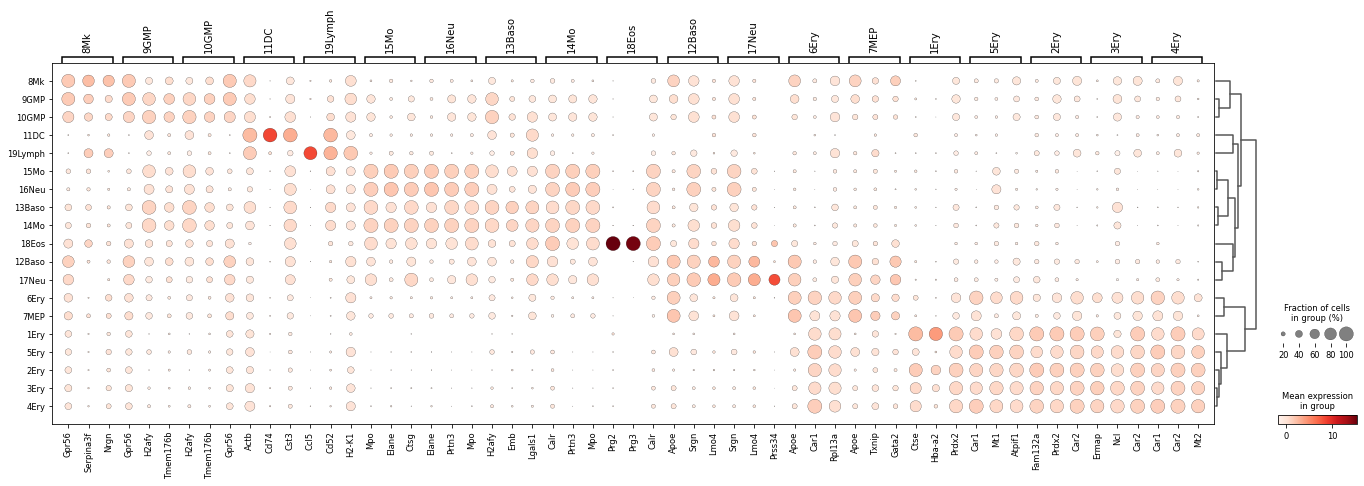

In [14]:
marker_genes(adata, n_genes=3)

In [15]:
from descartes_rpa.pl import pathways

In [17]:
pathways(adata, "18Eos")

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…